# Dimension reduction and Clustering

In [7]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob #Used to read all present files
pd.set_option('display.max_rows', 1000)

## Removing Null Values and NAs from the Data

In [8]:
all_data = pd.DataFrame()
for f in glob.glob("data/*_fixed.xlsx"):
    print(f)
    df = pd.read_excel(f, skiprows = range(0, 1))
    all_data = all_data.append(df,ignore_index=True,sort=True)
# all_data.describe()
# Drop all columns that have missing values

# print(all_data.columns[all_data.isna()].tolist())
for f in all_data.columns[all_data.isna().any()].tolist():
    # working on set NaN to average of column
    for n in all_data[all_data[f].isnull()]:
        print(n)
#     all_data = all_data.drop(f, axis= 1) #Drop all NaN's
# print(all_data)

data\airport_line_airport_line_house_1_fixed.xlsx
data\hurondale_hurondale_house_1_fixed.xlsx
data\south_huron_south_huron_house_1_fixed.xlsx
data\wiedrick_poultry_wiedrick_poultry_house_1_fixed.xlsx
Animal age
Animal weight
Animal weight - Deviation
Animal weight - Growth per day
Animal weight - Normality
Animal weight - Uniformity
Average house temperature
Average inside RH
Average outside RH
Average outside temperature
Date
Difference Inside - Outside
Feed conversion (FC)
Feed per animal
Number of animals
Water feed conversion (W:F)
Water per animal
Animal age
Animal weight
Animal weight - Deviation
Animal weight - Growth per day
Animal weight - Normality
Animal weight - Uniformity
Average house temperature
Average inside RH
Average outside RH
Average outside temperature
Date
Difference Inside - Outside
Feed conversion (FC)
Feed per animal
Number of animals
Water feed conversion (W:F)
Water per animal
Animal age
Animal weight
Animal weight - Deviation
Animal weight - Growth per day


## Retreiving farm#1 data and plotting it's correlation (and correlation values)

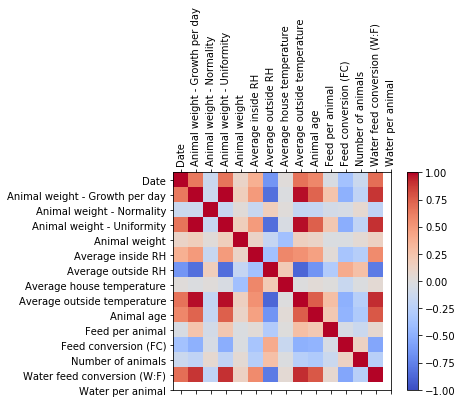

In [9]:
data=pd.read_excel("./data/airport_line_airport_line_house_1_fixed.xlsx", skiprows = range(0, 1))
# data2=pd.read_excel("./data/hunt_farm_hunt_farm_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# data3=pd.read_excel("./data/hurondale_hurondale_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# fixedData = data['data.feed_per_animal']
# data=pd.concat()
# print(data)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [10]:
highCorr = corr[corr>0]
print(highCorr[highCorr<1].stack())
highCorr[highCorr<1].stack().to_csv("./data/correlation.csv")
highCorr[highCorr<1].stack().to_string("./data/correlation.txt")

Animal weight - Growth per day  Animal weight - Normality         0.642138
                                Animal weight                     0.666193
                                Average inside RH                 0.114976
                                Average outside RH                0.377129
                                Average outside temperature       0.019801
                                Animal age                        0.677228
                                Feed per animal                   0.583720
                                Water per animal                  0.694253
Animal weight - Normality       Animal weight - Growth per day    0.642138
                                Animal weight                     0.994353
                                Average inside RH                 0.169874
                                Average outside RH                0.498029
                                Animal age                        0.981492
                         

c:\users\tempe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


### Writing correlation to a .txt file

In [11]:
# output = open("./data/correlation.txt","w+")
# output.write(highCorr[highCorr<1].stack())
# output.close()



In [12]:
# corr.stack().to_csv("./data/correlation.csv",encoding='utf-8-sig')

## Linear Regression House Temp (Inside) and Food eaten per Animal

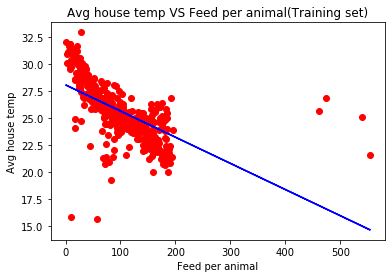

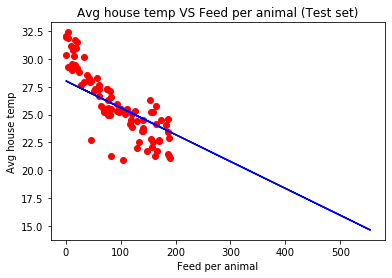

[[24.64592866]
 [26.09081615]
 [27.65187549]
 [27.80193081]
 [27.95924687]
 [27.73174365]
 [27.94956588]
 [28.03911502]
 [23.46726835]
 [27.75594612]
 [25.52205809]
 [26.18520578]
 [23.50599231]
 [27.78014859]
 [28.0124923 ]
 [26.64747297]
 [23.47210885]
 [24.96782152]
 [26.03999096]
 [27.22107152]
 [24.11589456]
 [24.29741309]
 [24.28289161]
 [26.7878473 ]
 [24.91699633]
 [23.82788516]
 [24.22964617]
 [27.5236024 ]
 [25.34780031]
 [27.46067598]
 [26.58454655]
 [26.19972727]
 [27.01051003]
 [26.20698801]
 [25.22194746]
 [24.65318941]
 [26.16100331]
 [27.78740933]
 [27.62767302]
 [27.73900439]
 [24.18850197]
 [25.15418054]
 [27.55506561]
 [23.52293404]
 [24.06748962]
 [24.00214295]
 [23.62942491]
 [27.10731991]
 [24.47651137]
 [26.93064187]
 [26.02546948]
 [23.93679628]
 [26.20214751]
 [24.18850197]
 [23.93921653]
 [27.59378956]
 [25.12271733]
 [26.17310455]
 [26.35220283]
 [26.55550358]
 [26.97420632]
 [24.05054789]
 [26.47079494]
 [28.02943403]
 [25.62612872]
 [24.31435482]
 [23.54713

In [78]:
data=pd.read_excel("./data/airport_line_airport_line_house_1_fixed.xlsx", skiprows = range(0, 1))
y = data.iloc[:, 7].to_frame() # Average house temperature
X = data.iloc[:, 10].to_frame() # Feed per animal
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Avg house temp VS Feed per animal(Training set)')
viz_train.ylabel('Avg house temp')
viz_train.xlabel('Feed per animal')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Avg house temp VS Feed per animal (Test set)')
viz_test.ylabel('Avg house temp')
viz_test.xlabel('Feed per animal')
viz_test.show()

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)


## Accuracy Test Model (X input)

In [81]:
#See how accurate the model is:
test = X_test.iloc[0].to_frame()
y_pred = regressor.predict(X_test)
#print(y_pred)
#print(y_test.iloc[0].to_frame())

array = np.isclose(y_pred, y_test, rtol = .1) # testing per 0.1 degree Celcius inside temperature
print(len(array))
np.sum(array)
acc = np.sum(array) / len(array) * 100
print(acc)

89
77.52808988764045


## Accuracy Test Model (Y input) 

In [95]:
#See how accurate the model is:
test = y_test.iloc[0].to_frame()
X_pred = regressor.predict(y_test)
#print(y_pred)
#print(y_test.iloc[0].to_frame())

array = np.isclose(X_pred, X_test, rtol = 1.0) # Testing per 1 gram of food eaten
print(len(array))
np.sum(array)
acc = np.sum(array) / len(array) * 100
print(acc)

89
84.26966292134831


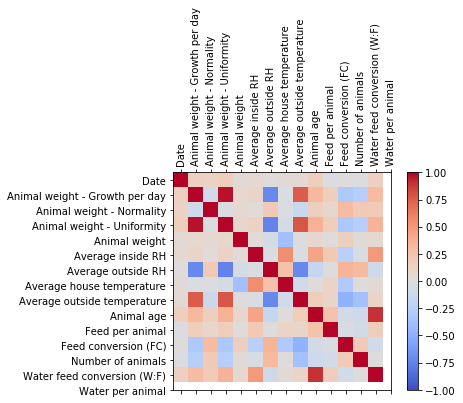

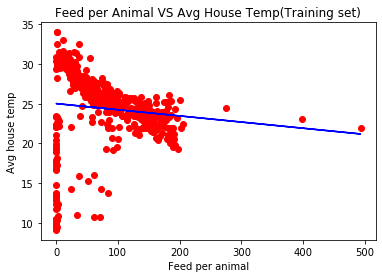

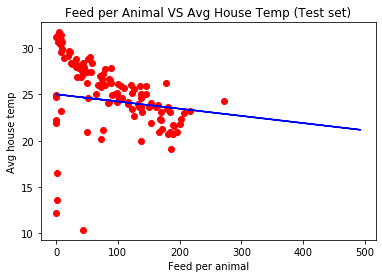

118
92.37288135593221


In [75]:
data_barn_2 = pd.read_excel("./data/hurondale_hurondale_house_1_fixed.xlsx", skiprows = range(0, 1))

corr2 = data_barn_2.corr()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cax2 = ax2.matshow(corr2,cmap='coolwarm', vmin=-1, vmax=1)
fig2.colorbar(cax2)
ticks2 = np.arange(0,len(data_barn_2.columns),1)
ax2.set_xticks(ticks2)
plt.xticks(rotation=90)
ax2.set_yticks(ticks2)
ax2.set_xticklabels(data_barn_2.columns)
ax2.set_yticklabels(data_barn_2.columns)
plt.show()

y2 = data_barn_2.iloc[:, 7].to_frame() # Average house temperature
X2 = data_barn_2.iloc[:, 10].to_frame() # Feed per animal

#print(X2)
#print(y2)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Feed per Animal VS Avg House Temp(Training set)')
viz_train.ylabel('Avg house temp')
viz_train.xlabel('Feed per animal')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Feed per Animal VS Avg House Temp (Test set)')
viz_test.ylabel('Avg house temp')
viz_test.xlabel('Feed per animal')
viz_test.show()

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred2 = regressor.predict(X_test)
#print(y_pred2)

#See how accurate the model is:
test = X_test.iloc[0].to_frame()
y_pred = regressor.predict(X_test)

#print(y_pred)
#print(y_test.iloc[0].to_frame())

array2 = np.isclose(y_pred, y_test, rtol = .2) # check the docs, type 
print(len(array2))
np.sum(array2)
acc2 = np.sum(array2) / len(array2) * 100
print(acc2)

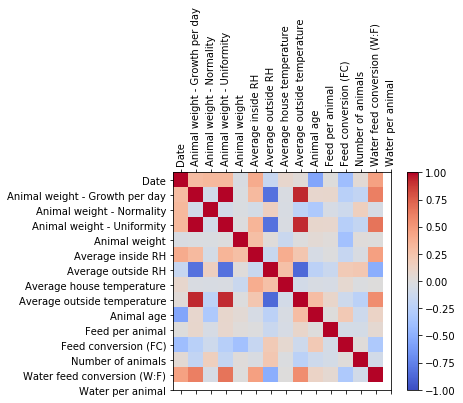

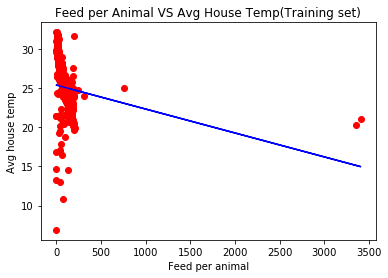

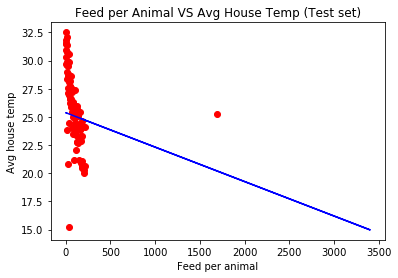

103
59.22330097087378


In [61]:
data_barn_2 = pd.read_excel("./data/south_huron_south_huron_house_1_fixed.xlsx", skiprows = range(0, 1))

corr2 = data_barn_2.corr()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cax2 = ax2.matshow(corr2,cmap='coolwarm', vmin=-1, vmax=1)
fig2.colorbar(cax2)
ticks2 = np.arange(0,len(data_barn_2.columns),1)
ax2.set_xticks(ticks2)
plt.xticks(rotation=90)
ax2.set_yticks(ticks2)
ax2.set_xticklabels(data_barn_2.columns)
ax2.set_yticklabels(data_barn_2.columns)
plt.show()

y2 = data_barn_2.iloc[:, 7].to_frame() # Average house temperature
X2 = data_barn_2.iloc[:, 10].to_frame() # Feed per animal
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Feed per Animal VS Avg House Temp(Training set)')
viz_train.ylabel('Avg house temp')
viz_train.xlabel('Feed per animal')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Feed per Animal VS Avg House Temp (Test set)')
viz_test.ylabel('Avg house temp')
viz_test.xlabel('Feed per animal')
viz_test.show()

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred2 = regressor.predict(X_test)
#print(y_pred2)

#See how accurate the model is:
test = X_test.iloc[0].to_frame()
y_pred = regressor.predict(X_test)

#print(y_pred)
#print(y_test.iloc[0].to_frame())

array2 = np.isclose(y_pred, y_test, rtol = .1) # check the docs, type 
print(len(array2))
np.sum(array2)
acc2 = np.sum(array2) / len(array2) * 100
print(acc2)

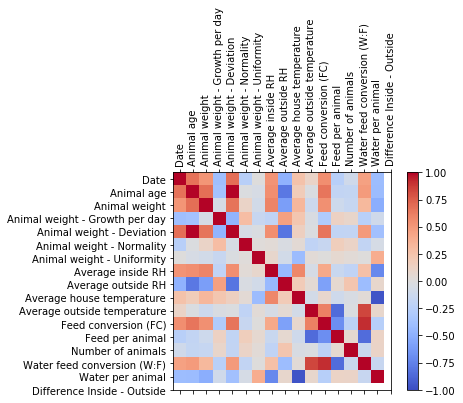

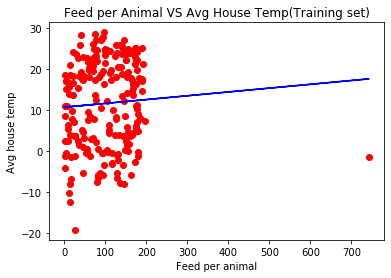

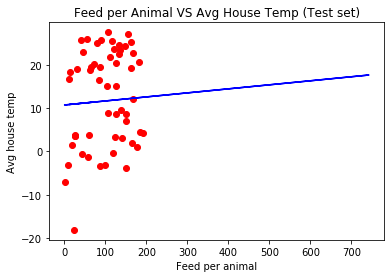

[[11.63829228]
 [11.95852754]
 [12.28248647]
 [12.00972794]
 [12.09351043]
 [10.8190858 ]
 [11.69787093]
 [12.16426008]
 [11.00433818]
 [12.13074708]
 [12.44912051]
 [11.10487715]
 [11.84774848]
 [11.80864999]
 [12.37743994]
 [10.79767472]
 [12.12423067]
 [10.90007553]
 [11.75558775]
 [11.24823829]
 [11.9678367 ]
 [11.89243247]
 [12.12702342]
 [11.99204053]
 [12.24338797]
 [11.11418632]
 [10.9605851 ]
 [11.71369651]
 [11.89150156]
 [12.26293722]
 [12.28341738]
 [12.51707741]
 [12.22849331]
 [11.2603402 ]
 [11.87009048]
 [11.50330939]
 [10.73344149]
 [11.30781694]
 [11.54054605]
 [12.03206994]
 [11.56474988]
 [11.83006107]
 [11.88777789]
 [11.70531827]
 [11.28826769]
 [10.93451944]
 [11.4753819 ]
 [11.52844414]
 [11.14956114]
 [11.3394681 ]
 [10.84328963]
 [11.39439217]
 [10.95406869]
 [10.95406869]
 [12.42398577]]
55
1.8181818181818181


In [59]:
data_barn_2 = pd.read_excel("./data/wiedrick_poultry_wiedrick_poultry_house_1_fixed.xlsx", skiprows = range(0, 1))

corr2 = data_barn_2.corr()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cax2 = ax2.matshow(corr2,cmap='coolwarm', vmin=-1, vmax=1)
fig2.colorbar(cax2)
ticks2 = np.arange(0,len(data_barn_2.columns),1)
ax2.set_xticks(ticks2)
plt.xticks(rotation=90)
ax2.set_yticks(ticks2)
ax2.set_xticklabels(data_barn_2.columns)
ax2.set_yticklabels(data_barn_2.columns)
plt.show()

y2 = data_barn_2.iloc[:, 10].to_frame() # Average house temperature
X2 = data_barn_2.iloc[:, 12].to_frame() # Feed per animal
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Feed per Animal VS Avg House Temp(Training set)')
viz_train.ylabel('Avg house temp')
viz_train.xlabel('Feed per animal')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Feed per Animal VS Avg House Temp (Test set)')
viz_test.ylabel('Avg house temp')
viz_test.xlabel('Feed per animal')
viz_test.show()

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred2 = regressor.predict(X_test)
print(y_pred2)

#See how accurate the model is:
test = X_test.iloc[0].to_frame()
y_pred = regressor.predict(X_test)

#print(y_pred)
#print(y_test.iloc[0].to_frame())

array2 = np.isclose(y_pred, y_test, rtol = .1) # check the docs, type 
print(len(array2))
np.sum(array2)
acc2 = np.sum(array2) / len(array2) * 100
print(acc2)